In [11]:
# Importing necessary libraries for this task.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

### Load the Dataset

In [3]:
data = pd.read_csv('E:\\diabetes\\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Check for Missing Data

<AxesSubplot:>

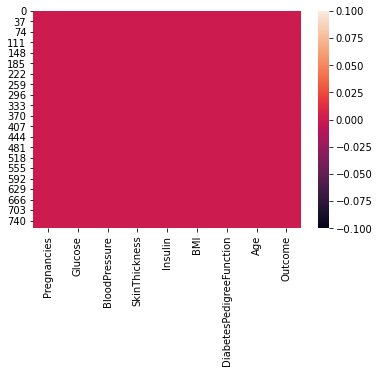

In [4]:
sns.heatmap(data.isnull())

### Correlation Matrix

In [5]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

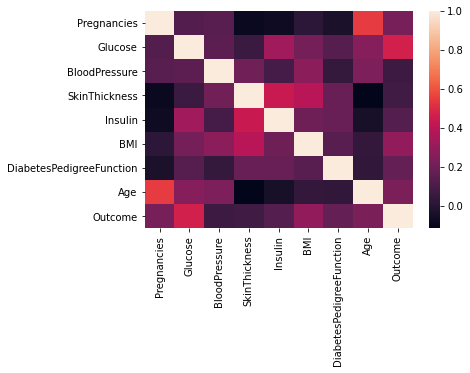

In [6]:
sns.heatmap(correlation)

#### Train Test Split

In [8]:
X = data.drop("Outcome", axis=1)
Y = data['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
128,1,117,88,24,145,34.5,0.403,40
724,1,111,94,0,0,32.8,0.265,45
273,1,71,78,50,45,33.2,0.422,21
196,1,105,58,0,0,24.3,0.187,21
634,10,92,62,0,0,25.9,0.167,31
...,...,...,...,...,...,...,...,...
494,3,80,0,0,0,0.0,0.174,22
463,5,88,78,30,0,27.6,0.258,37
309,2,124,68,28,205,32.9,0.875,30
666,4,145,82,18,0,32.5,0.235,70


### Train the Model

In [12]:
model = LogisticRegression()
model.fit(X_train, Y_train)

c:\users\user\desktop\kdd\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Making Predictions

In [13]:
predictions = model.predict(X_test)

In [14]:
print(predictions)

[1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 1 1 0 0 0]


### Evaluation

In [15]:
accuracy = accuracy_score(predictions, Y_test)
print(accuracy)

0.7532467532467533
